In [2]:
import numpy as np
import pandas as pd
from pyspark.sql import Window
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col
from matplotlib import pyplot as plt
import os

os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
spark = SparkSession.builder.appName('abc').getOrCreate()

In [4]:
df_EC = spark.read.option("inferSchema","true").csv("EC*",header=True)
df_AVH = spark.read.option("inferSchema","true").csv("AVH*",header=True)
df_AVAL = spark.read.option("inferSchema","true").csv("AVAL*",header=True)

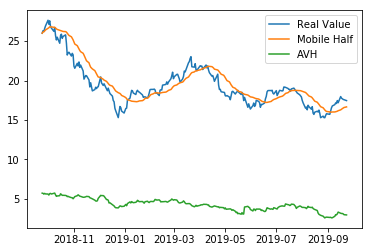

In [7]:
window1 = Window.orderBy(df_EC.Date).rowsBetween(-20,0)
df17 = df_EC.select('Date', F.avg('Close').over(window1).alias('Average'))
fig, ax = plt.subplots()
EC_pd = df_EC.toPandas()
EC_AVG = df17.toPandas()
AVH_pd = df_AVH.toPandas()
EC_pd.set_index("Date")
EC_AVG.set_index("Date")
ax.plot(EC_pd.Date, EC_pd.Close, label="Real Value")
ax.plot(EC_AVG.Date, EC_AVG.Average, label="Mobile Half")
ax.plot(AVH_pd.Date, AVH_pd.Close, label="AVH")
ax.legend()